In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Mengimport data
datmin = pd.read_csv('/content/diabetes.csv')

In [19]:
# Preprocessing

# Mengidentifikasi nilai tak wajar sebagai missing value
datmin['Glucose'] = datmin['Glucose'].replace(0, np.nan)
datmin['BloodPressure'] = datmin['BloodPressure'].replace(0, np.nan)
datmin['SkinThickness'] = datmin['SkinThickness'].replace(0, np.nan)
datmin['Insulin'] = datmin['Insulin'].replace(0, np.nan)
datmin['BMI'] = datmin['BMI'].replace(0, np.nan)

In [24]:
# Tampilan hasil preprocessing
# Cek missing value
total_missing = datmin.isnull().sum().sort_values(ascending=False)
missing_percentage = (total_missing / len(datmin)) * 100
missing_data = pd.concat([total_missing, missing_percentage], axis=1, keys=['Total Missing', 'Missing Percentage'])
print("Missing Value Information:")
print(missing_data)

Missing Value Information:
                          Total Missing  Missing Percentage
Insulin                             374           48.697917
Glucose                               5            0.651042
Pregnancies                           0            0.000000
BloodPressure                         0            0.000000
SkinThickness                         0            0.000000
BMI                                   0            0.000000
DiabetesPedigreeFunction              0            0.000000
Age                                   0            0.000000
Outcome                               0            0.000000


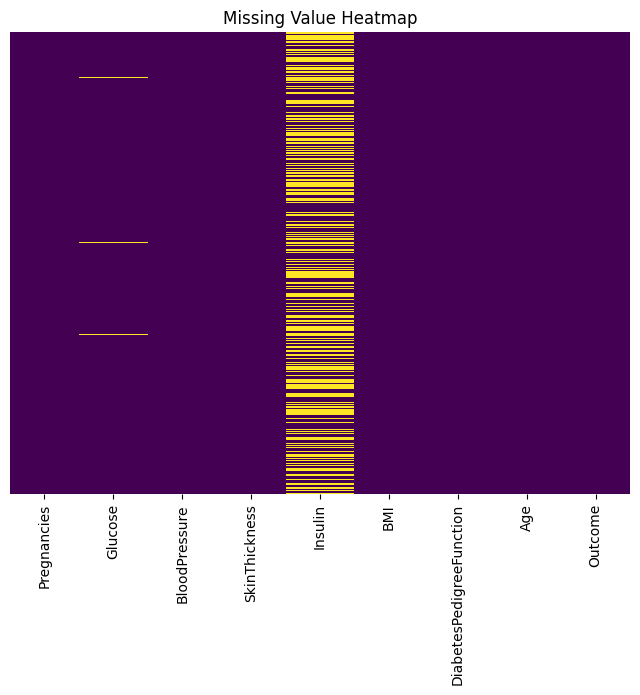

In [25]:
# Visualisasi missing value
plt.figure(figsize=(8, 6))
sns.heatmap(datmin.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [20]:
# Imputasi Missing Value
df1 = datmin.loc[datmin['Outcome'] == 0]
df2 = datmin.loc[datmin['Outcome'] == 1]

df1['Glucose'].fillna(df1['Glucose'].mean(), inplace=True)
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace=True)

df1['Insulin'].fillna(df1['Insulin'].median(), inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace=True)

mean1 = datmin['BloodPressure'].mean()
datmin['BloodPressure'].fillna(mean1, inplace=True)
mean2 = datmin['SkinThickness'].mean()
datmin['SkinThickness'].fillna(mean2, inplace=True)
mean3 = datmin['BMI'].mean()
datmin['BMI'].fillna(mean3, inplace=True)

<ipython-input-20-2080b9e2d6e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Glucose'].fillna(df1['Glucose'].mean(), inplace=True)
<ipython-input-20-2080b9e2d6e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Glucose'].fillna(df2['Glucose'].mean(), inplace=True)
<ipython-input-20-2080b9e2d6e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Insulin'].fillna(df1['Insulin'].median(), inplace=True)
<ipython-input-20

In [21]:
# Feature Scaling
scaler = StandardScaler()
datmin_scaled = scaler.fit_transform(datmin.drop('Outcome', axis=1))

In [26]:
# Tampilan hasil scaling
scaled_data = pd.DataFrame(datmin_scaled, columns=datmin.columns[:-1])
print("Scaled Data:")
print(scaled_data.head())

Scaled Data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.862287      -0.033518   6.655021e-01       NaN  0.166292   
1    -0.844885 -1.202229      -0.529859  -1.746338e-02       NaN -0.852531   
2     1.233880  2.009241      -0.695306   8.087936e-16       NaN -1.332833   
3    -0.844885 -1.071148      -0.529859  -7.004289e-01 -0.518847 -0.634212   
4    -1.141852  0.501816      -2.680669   6.655021e-01  0.104968  1.548980   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [22]:
# Split Training Testing Data
X = datmin_scaled
y = datmin['Outcome']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Tampilan hasil split data
print("Jumlah data dalam training set:", len(xTrain))
print("Jumlah data dalam testing set:", len(xTest))

print("\nTraining set - Fitur:")
print(xTrain[:5])  # Menampilkan 5 data pertama dalam training set

print("\nTraining set - Label:")
print(yTrain[:5])  # Menampilkan 5 label pertama dalam training set

print("\nTesting set - Fitur:")
print(xTest[:5])  # Menampilkan 5 data pertama dalam testing set

print("\nTesting set - Label:")
print(yTest[:5])  # Menampilkan 5 label pertama dalam testing set

Jumlah data dalam training set: 614
Jumlah data dalam testing set: 154

Training set - Fitur:
[[ 9.36913723e-01  9.27827561e-01  4.62822555e-01 -1.74633816e-02
  -2.49089283e-01  3.99165553e-01  6.64799691e-01  1.76634642e+00]
 [ 4.60143347e-02 -8.08987637e-01 -1.02619983e+00 -7.00428884e-01
              nan -6.19657367e-01 -8.72098593e-02 -9.56461683e-01]
 [-1.14185152e+00  1.41937903e+00  1.45550414e+00  4.37846953e-01
   4.42108873e+00  2.88800440e+00 -1.35531758e-01 -8.71373930e-01]
 [-8.44885053e-01 -4.15746461e-01 -1.35709369e+00 -9.28084051e-01
  -1.73219965e-01 -1.05629576e+00  1.09063642e+00 -8.71373930e-01]
 [ 1.23388019e+00 -5.52753817e-02  1.17557115e-15  8.08793628e-16
              nan -3.57674330e-01 -8.72440715e-01  4.04942367e-01]]

Training set - Label:
603    1
118    0
247    0
157    0
468    1
Name: Outcome, dtype: int64

Testing set - Fitur:
[[-8.44885053e-01  2.53356237e+00  2.97375623e-01  1.57612279e+00
              nan  1.51987076e+00  2.78492300e+00 -9.564

In [29]:
datmin_cleaned = datmin.dropna()


In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
datmin_imputed = imputer.fit_transform(datmin)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
yPred = logreg.predict(xTest)
print("Logistic Regression Accuracy:", accuracy_score(yTest, yPred))
print("Logistic Regression Classification Report:")
print(classification_report(yTest, yPred))

ValueError: ignored

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(xTrain, yTrain)
yPred = dtree.predict(xTest)
print("Decision Tree Accuracy:", accuracy_score(yTest, yPred))
print("Decision Tree Classification Report:")
print(classification_report(yTest, yPred))

In [ ]:
# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(xTrain, yTrain)
yPred = nb.predict(xTest)
print("Naive Bayes Accuracy:", accuracy_score(yTest, yPred))
print("Naive Bayes Classification Report:")
print(classification_report(yTest, yPred))